<a id="top"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Georgia;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>Graph Neural Network Explainability using Graph-SMILE</b></div>

The eisting example of GNN-based Synthetic Binding Logic Classification from google research team is used to test the idea of SMILE for the Explainability Graph Neural Networks. You can find the source code [here](https://github.com/google-research/graph-attribution) and the related paper for the code is available [here](https://papers.nips.cc/paper/2020/file/417fbbf2e9d5a28a855a11894b2e795a-Paper.pdf) [[1]](https://papers.nips.cc/paper/2020/file/417fbbf2e9d5a28a855a11894b2e795a-Paper.pdf).
Regarding the Graph-based distance measure, the theory of "Graph distance for complex networks" provided by of Yutaka Shimada et al. is used [[2]](https://www.nature.com/articles/srep34944). The code related to this paper is avaialble [here](https://github.com/msarrias/graph-distance-for-complex-networks).
You can read more about the idea of SMILE in [[3]](https://github.com/Dependable-Intelligent-Systems-Lab/xwhy). To read more about "Synthetic Binding Logic Classification" and the related dataset that is used in this notebook, please check [[4]](https://www.pnas.org/content/pnas/116/24/11624.full.pdf).

The X-Why project takes place at the University of Hull in collaboration with Fraunhofer IESE.

### References:
[[1]. Wiltschko, A. B., Sanchez-Lengeling, B., Lee, B., Reif, E., Wei, J., McCloskey, K. J., & Wang, Y. (2020). Evaluating Attribution for Graph Neural Networks.](https://papers.nips.cc/paper/2020/file/417fbbf2e9d5a28a855a11894b2e795a-Paper.pdf)

[[2]. Shimada, Y., Hirata, Y., Ikeguchi, T., & Aihara, K. (2016). Graph distance for complex networks. Scientific reports, 6(1), 1-6.](https://www.nature.com/articles/srep34944)

[[3]. Aslansefat, K., Sorokos, I., Whiting, D., Kolagari, R. T., & Papadopoulos, Y. (2020, September). SafeML: Safety Monitoring of Machine Learning Classifiers Through Statistical Difference Measures. In International Symposium on Model-Based Safety and Assessment (pp. 197-211). Springer, Cham.](https://arxiv.org/pdf/2005.13166.pdf)

[[4]. McCloskey, K., Taly, A., Monti, F., Brenner, M. P., & Colwell, L. J. (2019). Using attribution to decode binding mechanism in neural network models for chemistry. Proceedings of the National Academy of Sciences, 116(24), 11624-11629.](https://www.pnas.org/content/pnas/116/24/11624.full.pdf)

<a id="top"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>Table of content</b></div>

<div style="background-color:aliceblue; padding:30px; font-size:15px;color:#034914">
    
<a id="TOC"></a>
## Table of Content  
* [Initialization and Installations](#init)
* [Importing Required Libraries](#lib)
* [Graph Attribution Specific Imports](#glib)
* [Load Experiment Data, Task and Attribution Techniques](#load)
* [Creating a GNN Model](#model)
* [Graph Vizualization](#gviz)
* [X-Why Explainability for Graph Neural Networks](#xwhy-e)
    * [X-Why for Graph Edge Explainability](#xwhy-e)
    * [X-Why for Graph Node Explainability](#xwhy-n)
* [References](#ref)
</div>

<a id = "init"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>Initialization and Installations</b></div> 

In [1]:
import warnings
warnings.filterwarnings('ignore')

%load_ext autoreload
%autoreload 2

import sys
sys.path.append('..')

import sys

IN_COLAB = 'google.colab' in sys.modules
REPO_DIR = '..' if IN_COLAB  else '..'

In [2]:
!git clone https://github.com/google-research/graph-attribution.git --quiet
    
import sys
sys.path.insert(1, '/kaggle/working/graph-attribution')

In [3]:
!pip install tensorflow tensorflow-probability -q
!pip install dm-sonnet -q
!pip install graph_nets "tensorflow>=2.1.0-rc1" "dm-sonnet>=2.0.0b0" tensorflow_probability
!pip install git+https://github.com/google-research/graph-attribution -quiet
!pip install openpyxl -q

     |████████████████████████████████| 76 kB 2.8 MB/s 
  Created wheel for graph-nets: filename=graph_nets-1.1.0-py3-none-any.whl size=91865 sha256=943eee7dc4b5b0734aa2a804c703eb0fca1bfd09c5167efd04f1b731dcd97174
  Stored in directory: /root/.cache/pip/wheels/44/3d/65/f2e8f0a8d0b28bea5f168fc717261a67303d2183a3e450c812
Successfully built graph-nets

Usage:   
  pip install [options] <requirement specifier> [package-index-options] ...
  pip install [options] -r <requirements file> [package-index-options] ...
  pip install [options] [-e] <vcs project url> ...
  pip install [options] [-e] <local project path> ...
  pip install [options] <archive url/path> ...

no such option: -u


In [4]:
!pip install git+https://github.com/google-research/graph-attribution

  Cloning https://github.com/google-research/graph-attribution to /tmp/pip-req-build-z2qm41qv
  Running command git clone -q https://github.com/google-research/graph-attribution /tmp/pip-req-build-z2qm41qv
     |████████████████████████████████| 77 kB 3.4 MB/s 
  Created wheel for graph-attribution: filename=graph_attribution-1.0.0b0-py3-none-any.whl size=50933 sha256=2e2d44876299786d68ad4ad599cab400f8890db84988b2e094c2f4f2ea5c8764
  Stored in directory: /tmp/pip-ephem-wheel-cache-kiz0xhe0/wheels/a3/b8/23/fb9853106c701cdaf9831913a2044299fe770d6efd36098629
  Created wheel for ml-collections: filename=ml_collections-0.1.1-py3-none-any.whl size=94496 sha256=ddc477260845043a172d3f02ab68e3f7600d260990e47d12e27e371545c1a507
  Stored in directory: /root/.cache/pip/wheels/b7/da/64/33c926a1b10ff19791081b705879561b715a8341a856a3bbd2
Successfully built graph-attribution ml-collections


<a id="lib"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>Importing Required Libraries</b></div> 

In [5]:
import os
import sys
import itertools
import collections
import tqdm.auto as tqdm

from IPython.display import display

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf
import sonnet as snt
import graph_nets
from graph_nets.graphs import GraphsTuple
import graph_attribution as gatt

from tqdm import tqdm

import time

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score, accuracy_score
from sklearn import metrics

from itertools import count

from matplotlib import pyplot as plt
from matplotlib.ticker import MultipleLocator
import scipy.linalg as la
import networkx as nx
import random, time, math
from collections import Counter

from sklearn.linear_model import LinearRegression

# Ignore tf/graph_nets UserWarning:
# Converting sparse IndexedSlices to a dense Tensor of unknown shape
import warnings
warnings.simplefilter("ignore", UserWarning)

for mod in [tf, snt, gatt]:
    print(f'{mod.__name__:20s} = {mod.__version__}')

rdkit detected? False
tensorflow           = 2.4.1
sonnet               = 2.0.1
graph_attribution    = 1.0.0b


<a id = "glib"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>Graph Attribution Specific Imports</b></div> 

In [6]:
from graph_attribution import tasks
from graph_attribution import graphnet_models as gnn_models
from graph_attribution import graphnet_techniques as techniques
from graph_attribution import datasets
from graph_attribution import experiments
from graph_attribution import templates
from graph_attribution import graphs as graph_utils

#datasets.DATA_DIR = os.path.join(REPO_DIR, 'data')
#print(f'Reading data from: {datasets.DATA_DIR}')

datasets.DATA_DIR = './graph-attribution/data'

<a id = "glib"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>Load Experiment Data, Task and Attribution Techniques</b></div> 

In [7]:
print(f'Available tasks: {[t.name for t in tasks.Task]}')
print(f'Available model types: {[m.name for m in gnn_models.BlockType]}')
print(f'Available ATT techniques: {list(techniques.get_techniques_dict(None,None).keys())}')

Available tasks: ['benzene', 'logic7', 'logic8', 'logic10', 'crippen', 'bashapes', 'treegrid', 'bacommunity']
Available model types: ['gcn', 'gat', 'mpnn', 'graphnet']
Available ATT techniques: ['Random', 'GradInput', 'SmoothGrad(GradInput)', 'GradCAM-last', 'GradCAM-all', 'CAM']


In [8]:
task_type = 'benzene' 
block_type = 'mpnn'

#task_dir = datasets.get_task_dir(task_type)
task_dir = './graph-attribution/data/logic7'
exp, task, methods = experiments.get_experiment_setup(task_type, block_type)
task_act, task_loss = task.get_nn_activation_fn(), task.get_nn_loss_fn()
graph_utils.print_graphs_tuple(exp.x_train)
print(f'Experiment data fields:{list(exp.__dict__.keys())}')

Shapes of GraphsTuple's fields:
GraphsTuple(nodes=TensorShape([205826, 14]), edges=TensorShape([436434, 5]), receivers=TensorShape([436434]), senders=TensorShape([436434]), globals=TensorShape([10000, 1]), n_node=TensorShape([10000]), n_edge=TensorShape([10000]))
Experiment data fields:['x_train', 'x_test', 'y_train', 'y_test', 'att_test', 'x_aug', 'y_aug']


<a id = "model"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>Creating a GNN Model</b></div> 

## Defining Hyperparams of the Experiment

In [9]:
hp = gatt.hparams.get_hparams({'block_type':block_type, 'task_type':task_type})
hp

batch_size: 256
block_type: mpnn
edge_size: 20
epochs: 300
global_size: 100
learning_rate: 0.0003
n_layers: 3
node_size: 50
random_seed: 42
task_type: benzene

### Instantiate model

In [10]:
model = experiments.GNN(node_size = hp.node_size,
               edge_size = hp.edge_size,
               global_size = hp.global_size,
               y_output_size = task.n_outputs,
               block_type = gnn_models.BlockType(hp.block_type),
               activation = task_act,
               target_type = task.target_type,
               n_layers = hp.n_layers)
model(exp.x_train)
gnn_models.print_model(model)

GNN : mpnn

| Variable                                   | Spec        | Trainable   | Device   |
|--------------------------------------------+-------------+-------------+----------|
| mpnn/ReadoutGAP/linear/w                   | f32[20,100] | True        | CPU      |
| mpnn/ReadoutGAP/linear/w                   | f32[50,100] | True        | CPU      |
| mpnn/ReadoutGAP/linear/b                   | f32[100]    | True        | CPU      |
| mpnn/ReadoutGAP/linear/b                   | f32[100]    | True        | CPU      |
| mpnn/graph_independent/edge_model/linear/w | f32[5,20]   | True        | CPU      |
| mpnn/graph_independent/edge_model/linear/b | f32[20]     | True        | CPU      |
| mpnn/graph_independent/node_model/linear/w | f32[14,50]  | True        | CPU      |
| mpnn/graph_independent/node_model/linear/b | f32[50]     | True        | CPU      |
| mpnn/linear/w                              | f32[100,1]  | True        | CPU      |
| mpnn/mpnn_1/edge_block/layer_norm/offset

<a id ="train"></a>
## Training the GNN Model

In [11]:
%%time
optimizer = snt.optimizers.Adam(hp.learning_rate)

opt_one_epoch = gatt.training.make_tf_opt_epoch_fn(exp.x_train, exp.y_train, hp.batch_size, model,
                                      optimizer, task_loss)

pbar = tqdm(range(hp.epochs))
losses = collections.defaultdict(list)
start_time = time.time()
for _ in pbar:
    train_loss = opt_one_epoch(exp.x_train, exp.y_train).numpy()
    losses['train'].append(train_loss)
    losses['test'].append(task_loss(exp.y_test, model(exp.x_test)).numpy())
    #pbar.set_postfix({key: values[-1] for key, values in losses.items()})

losses = {key: np.array(values) for key, values in losses.items()}

100%|██████████| 300/300 [17:29<00:00,  3.50s/it]

CPU times: user 46min 42s, sys: 3min 20s, total: 50min 2s
Wall time: 17min 29s


In [12]:
y_pred = model(exp.x_test).numpy()
y_pred[y_pred > 0.5] = 1
y_pred[y_pred <= 0.5] = 0

print(accuracy_score(exp.y_test, y_pred))

print(confusion_matrix(exp.y_test, y_pred))

print(classification_report(exp.y_test, y_pred))

1.0
[[1001    0]
 [   0  999]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1001
         1.0       1.00      1.00      1.00       999

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



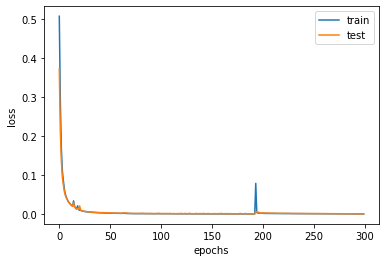

In [13]:
# Plot losses
for key, values in losses.items():
    plt.plot(values, label=key)
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()
plt.show()

In [14]:
# Evaluate predictions and attributions
results = []
att_preds = []
for method in tqdm(methods.values(), total=len(methods)):
    results.append(experiments.generate_result(model, method, task, exp.x_test, exp.y_test, exp.att_test))
    att_preds.append(experiments.get_batched_attributions(method, model, exp.x_test, batch_size = 2500))
df1 = pd.DataFrame(results)

100%|██████████| 7/7 [18:12<00:00, 156.11s/it]


In [15]:
df1.to_excel("gatt_results.xlsx")

In [16]:
idx = 4
print(exp.att_test[idx])
test_gg = graph_nets.utils_np.graphs_tuple_to_networkxs(exp.att_test[idx])
print(test_gg[0].nodes)
print(test_gg[0].edges)

GraphsTuple(nodes=array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32), edges=None, receivers=array([ 1,  0,  2,  1,  3,  2,  4,  3,  5,  4,  6,  4,  7,  6,  8,  7,  9,
        8, 10,  9, 11, 10, 12, 11, 13, 12, 14, 13, 15, 14, 16, 13, 17, 12,
       18, 17, 19,  8, 20, 19, 21, 19,  1,  5,  6, 21, 10, 14],
      dtype=int32), senders=array([ 0,  1,  1,  2,  2,  3,  3,  4,  4,  5,  4,  6,  6,  7,  7,  8,  8,
        9,  9, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14, 15, 13, 16, 12, 17,
       17, 18,  8, 19, 19, 20, 19, 21,  5,  1, 21,  6, 14, 10],
      dtype=int32), globals=array([[0.]], dtype=float32), n_node=array([22], dtype=int32), n_edge=array([48], dtype=int32))
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21

In [17]:
exp.att_test[446].nodes

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)

In [18]:
att_true = [graph_utils.cast_to_np(att) for att in exp.att_test[446]]
att_true[0]

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)

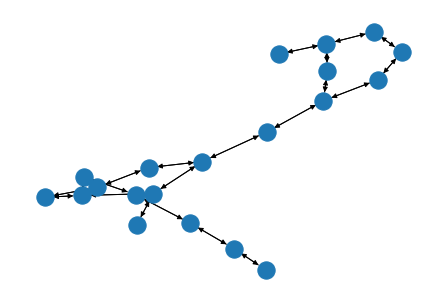

In [19]:
graphs_nx = graph_nets.utils_np.graphs_tuple_to_networkxs(exp.x_test)

nx.draw(graphs_nx[446])

<a id = "gviz"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>Graph Vizualization</b></div> 

In [20]:
# Source: https://notebook.community/deepmind/graph_nets/graph_nets/demos/graph_nets_basics
graphs_nx = graph_nets.utils_np.graphs_tuple_to_networkxs(exp.x_test)

def nx_g_plotter(graphs_nx, ColNum=8, node_clr='#ff8080'):
    _, axs = plt.subplots(ncols=ColNum, nrows = 1, figsize=(30, 5))
    for iax, (graph_nx2, ax) in enumerate(zip(graphs_nx, axs)):
        nx.draw(graph_nx2, ax=ax, node_color=node_clr)
        ax.set_title("Graph {}".format(iax))

In [21]:
!git clone https://github.com/msarrias/graph-distance-for-complex-networks --quiet

sys.path.insert(1, '/kaggle/working/graph-distance-for-complex-networks')

import fun as f

from Graph import Graph
from Watts_Strogatz import watts_strogatz_graph
from Erdos_Renyi import erdos_renyi_graph

<a id = "xwhy-e"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>X-Why for Graph Edge Explainability</b></div> 

In [22]:
def Wasserstein_Dist(cdfX, cdfY):
  
    Res = 0
    power = 1
    n = len(cdfX)

    for ii in range(0, n-2):
        height = abs(cdfX[ii]-cdfY[ii])
        width = cdfX[ii+1] - cdfX[ii]
        Res = Res + (height ** power) * width 
 
    return Res


def r_eigenv(G_i, G_j):
    #Eigen-decomposition of G_j
    A_Gi = (nx.adjacency_matrix(G_i)).todense()
    D_i = np.diag(np.asarray(sum(A_Gi))[0])
    eigenvalues_Gi, eigenvectors_Gi = la.eig(D_i - A_Gi)
    r_eigenv_Gi = sorted(zip(eigenvalues_Gi.real, eigenvectors_Gi.T), key=lambda x: x[0])

    #Eigen-decomposition of G_j
    A_Gj = (nx.adjacency_matrix(G_j)).todense()
    D_j = np.diag(np.asarray(sum(A_Gj))[0])
    eigenvalues_Gj, eigenvectors_Gj = la.eig(D_j - A_Gj)
    r_eigenv_Gj = sorted(zip(eigenvalues_Gj.real, eigenvectors_Gj.T), key=lambda x: x[0])

    r = 4
    signs =[-1,1]
    temp = []
    for  sign_s in signs:
        for sign_l in signs:
            vri = sorted(f.normalize_eigenv(sign_s * r_eigenv_Gi[r][1]))
            vrj = sorted(f.normalize_eigenv(sign_l * r_eigenv_Gj[r][1]))
            cdf_dist = f.cdf_dist(vri, vrj)
            temp.append(cdf_dist)
    
    #Compute empirical CDF
    step = 0.005
    x=np.arange(0, 1, step)
    cdf_grid_Gip = f.cdf(len(r_eigenv_Gi[r][1]),x,
                   f.normalize_eigenv(sorted(r_eigenv_Gi[r][1], key=lambda x: x)))
    cdf_grid_Gin = f.cdf(len(r_eigenv_Gi[r][1]),x,
                   f.normalize_eigenv(sorted(-r_eigenv_Gi[r][1], key=lambda x: x)))

    cdf_grid_Gjp = f.cdf(len(r_eigenv_Gj[r][1]),x,
                   f.normalize_eigenv(sorted(r_eigenv_Gj[r][1], key=lambda x: x)))
    cdf_grid_Gjn = f.cdf(len(r_eigenv_Gj[r][1]),x,
                   f.normalize_eigenv(sorted(-r_eigenv_Gj[r][1], key=lambda x: x)))
    
    WD1 = Wasserstein_Dist(cdf_grid_Gip, cdf_grid_Gjp)
    WD2 = Wasserstein_Dist(cdf_grid_Gip, cdf_grid_Gjn)
    WD3 = Wasserstein_Dist(cdf_grid_Gin, cdf_grid_Gjp)
    WD4 = Wasserstein_Dist(cdf_grid_Gin, cdf_grid_Gjn)

    WD = [WD1, WD2, WD3, WD4]
    
    return max(temp), max(WD)

def xwhy_graph_edges(X_input_graph, model=model, num_perturb = 50, kernel_width = 0.25, num_top_features = 10, eps=1):    
    #num_perturb = 5000
    
    num_uniqe_edges = len(X_input_graph.edges)

    perturbations = np.random.binomial(1, 0.5, size=(num_perturb, num_uniqe_edges))

    def perturb_graph_edge(input_graph, perturbation):
        perturbed_graph = input_graph.copy()
        ebun = []
        for ii, ed in enumerate(perturbed_graph.edges):
            if perturbation[ii] == 0:
                ebun.append(ed)
        perturbed_graph.remove_edges_from(ebun)
        return perturbed_graph
        
    predictions = []
    WD_dist = []
    for pert in perturbations:
        p_graph = perturb_graph_edge(X_input_graph, pert)
        pred = model.predict(graph_nets.utils_np.networkxs_to_graphs_tuple([p_graph]))
        predictions.append(pred)
        Sscore, WD_score = r_eigenv(X_input_graph, p_graph)
        WD_dist.append(WD_score)

    predictions = np.array(predictions)   
    WD_dist = np.array(WD_dist) 
    
    weights = np.sqrt(np.exp(-((eps*WD_dist)**2)/kernel_width**2)) #Kernel function
                
    class_to_explain = 0
    simpler_model = LinearRegression()
    simpler_model.fit(X=perturbations, y=predictions, sample_weight=weights)
    coeff = simpler_model.coef_[0]
    
    top_features = np.argsort(abs(coeff))[-num_top_features:] 
    
    coeff2 = simpler_model.coef_
    
    # https://stackoverflow.com/questions/39626401/how-to-get-odds-ratios-and-other-related-features-with-scikit-learn
    odds = np.exp(coeff2)
    
    from sklearn.preprocessing import normalize

    Bounded_coeff = 2*(normalize(coeff[:,np.newaxis], axis=0).ravel()+1)
    
    return coeff, odds, top_features, Bounded_coeff, simpler_model 

In [23]:
%%time
idx = 0
coeff, odds, top_features, Bounded_coeff, simpler_model  = xwhy_graph_edges(graphs_nx[idx], model=model, 
                                                                            num_perturb = 5000, kernel_width = 0.25, num_top_features = 10, eps=1)

top_features

CPU times: user 1min 25s, sys: 1.19 s, total: 1min 27s
Wall time: 1min 22s


array([25, 15, 20, 19, 26, 27, 17, 18, 11, 24])

In [24]:
Bounded_coeff

array([2.01546597, 1.94340111, 2.06249383, 2.03149613, 1.94116918,
       2.11227891, 1.94377629, 1.93141895, 1.99303725, 2.06040468,
       2.03772755, 1.41770482, 2.03252816, 1.9868412 , 2.33331802,
       2.48565403, 2.43794365, 2.55216332, 2.55548516, 2.52483438,
       2.5206911 , 2.45174344, 2.38799594, 2.21500807, 2.6067897 ,
       2.46879658, 2.53566383, 2.53948153, 1.54595771, 1.7869565 ,
       2.10863661, 1.8511925 , 1.90530789, 1.96708015, 1.90110111,
       1.88005815, 1.92171676, 1.87064293, 1.92001814, 1.98289921,
       2.02917128, 1.94210859, 2.05098276, 1.97362825])

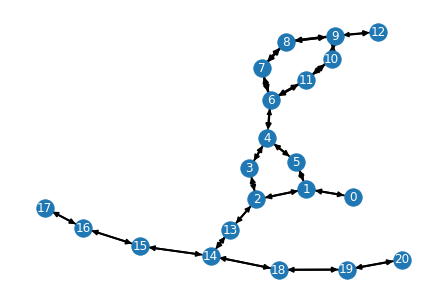

In [25]:
pos = nx.spring_layout(graphs_nx[idx],seed = 1314)

nx.draw(graphs_nx[idx], pos=pos, width=Bounded_coeff, with_labels=True, font_color='white',cmap='PiYG')

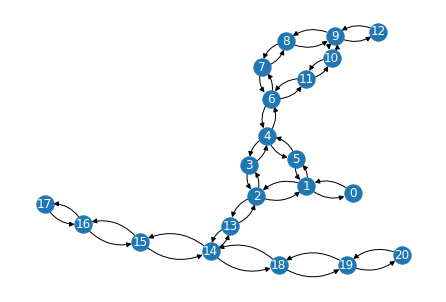

In [26]:
nx.draw(graphs_nx[idx], pos=pos, with_labels=True, font_color='white',connectionstyle='arc3, rad = 0.35')

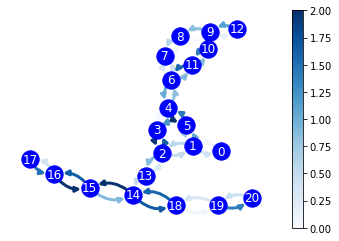

In [27]:
G = graphs_nx[idx].copy()
# G = nx.gnp_random_graph(10,0.3)
for u,v,d in G.edges(data=True):
    d['weight'] = random.random()

edges,weights = zip(*nx.get_edge_attributes(G,'weight').items())

# pos = nx.spring_layout(G)
fig, ax = plt.subplots()

nnn = nx.draw(G, pos, node_color='b', edgelist=edges, edge_color=weights, width=3.0, edge_cmap=plt.cm.Blues,with_labels=True, 
        font_color='white',connectionstyle='arc3, rad = 0.35', ax = ax)

colors=range(3)
cmap=plt.cm.Blues
vmin = min(colors)
vmax = max(colors)
# nx.draw(G, pos, node_color='#A0CBE2', edge_color=colors, width=4, edge_cmap=cmap,
#            with_labels=False, vmin=vmin, vmax=vmax)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin = vmin, vmax=vmax))
sm._A = []
plt.colorbar(sm)
plt.show()

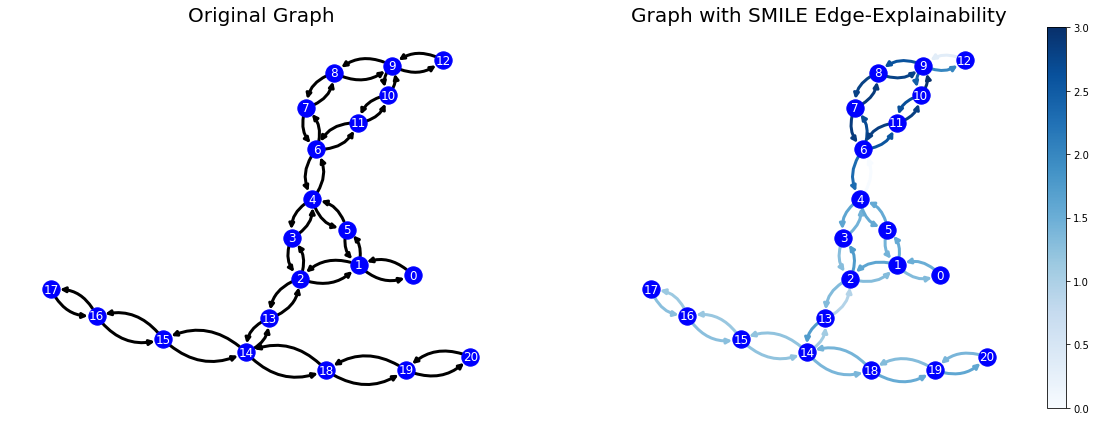

In [28]:
G = graphs_nx[idx].copy()
ii = 0
# G = nx.gnp_random_graph(10,0.3)
for u,v,d in G.edges(data=True):
    d['weight'] = Bounded_coeff[ii]
    ii += 1

edges,weights = zip(*nx.get_edge_attributes(G,'weight').items())

# pos = nx.spring_layout(G)

fig, axs = plt.subplots(1,2,figsize=(20,7))

nx.draw(G, pos, node_color='b', width=3.0, edge_cmap=plt.cm.Blues,with_labels=True, 
        font_color='white',connectionstyle='arc3, rad = 0.35', ax = axs[0])

nx.draw(G, pos, node_color='b', edgelist=edges, edge_color=weights, width=3.0, edge_cmap=plt.cm.Blues,with_labels=True, 
        font_color='white',connectionstyle='arc3, rad = 0.35', ax = axs[1])

colors=range(4)
cmap=plt.cm.Blues
vmin = min(colors)
vmax = max(colors)
# nx.draw(G, pos, node_color='#A0CBE2', edge_color=colors, width=4, edge_cmap=cmap,
#            with_labels=False, vmin=vmin, vmax=vmax)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin = vmin, vmax=vmax))
sm._A = []

axs[0].set_title('Original Graph',fontsize=20)
axs[1].set_title('Graph with SMILE Edge-Explainability',fontsize=20)

plt.colorbar(sm)
plt.show()

<a id = "xwhy-n"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>X-Why for Graph Node Explainability</b></div> 

In [29]:
num_uniqe_nodes = len(graphs_nx[idx].nodes)
num_perturb = 100
perturbations = np.random.binomial(1, 0.8, size=(num_perturb, num_uniqe_nodes))
# print(perturbations[0])

perturbed_node_graph = graphs_nx[0].copy()
ebun = []
for ii, nd in enumerate(perturbed_node_graph.nodes):
    if perturbations[0][ii] == 0:
            ebun.append(nd)
# print(ebun)
# print(perturbed_node_graph.nodes)

# print(perturbed_node_graph.degree())

perturbed_node_graph.remove_nodes_from(ebun)

# print(perturbed_node_graph.nodes)

# print(perturbed_node_graph.degree())


G = nx.convert_node_labels_to_integers(perturbed_node_graph,first_label=0)

aa = graph_nets.utils_np.networkxs_to_graphs_tuple([G])            

In [30]:
def xwhy_graph_nodes(X_input_graph, model=model, num_perturb = 50, kernel_width = 0.25, num_top_features = 10, eps=1, Remove_Zero_Degree_Nodes = 0):    
    #num_perturb = 5000
    
    num_uniqe_nodes = len(X_input_graph.nodes)

    perturbations = np.random.binomial(1, 0.5, size=(num_perturb, num_uniqe_nodes))
    
    def perturb_graph_node(input_graph, perturbation):
        perturbed_node_graph = input_graph.copy()
        ebun = []
        for ii, nd in enumerate(perturbed_node_graph.nodes):
            if perturbations[0][ii] == 0:
                    ebun.append(nd)

        perturbed_node_graph.remove_nodes_from(ebun)
        
        if Remove_Zero_Degree_Nodes:
            Zdegree_nodes = []
            for n, d in perturbed_node_graph.degree():
                if d == 0:
                    Zdegree_nodes.append(n)

            perturbed_node_graph.remove_nodes_from(Zdegree_nodes)
        
        perturbed_node_graph_reordered = nx.convert_node_labels_to_integers(perturbed_node_graph,first_label=0)
        
        return perturbed_node_graph_reordered

    def perturb_graph_edge(input_graph, perturbation):
        perturbed_graph = input_graph.copy()
        ebun = []
        for ii, ed in enumerate(perturbed_graph.edges):
            if perturbation[ii] == 0:
                ebun.append(ed)
        perturbed_graph.remove_edges_from(ebun)
        return perturbed_graph
        
    predictions = []
    WD_dist = []
    for pert in perturbations:
        p_graph = perturb_graph_node(X_input_graph, pert)
        if len(p_graph.nodes) != 0:
            pred = model.predict(graph_nets.utils_np.networkxs_to_graphs_tuple([p_graph]))
            predictions.append(pred)
            Sscore, WD_score = r_eigenv(X_input_graph, p_graph)
            WD_dist.append(WD_score)

    predictions = np.array(predictions)   
    WD_dist = np.array(WD_dist) 
    
    weights = np.sqrt(np.exp(-((eps*WD_dist)**2)/kernel_width**2)) #Kernel function
                
    class_to_explain = 0
    simpler_model = LinearRegression()
    simpler_model.fit(X=perturbations, y=predictions, sample_weight=weights)
    coeff = simpler_model.coef_[0]
    
    top_features = np.argsort(abs(coeff))[-num_top_features:] 
    
    coeff2 = simpler_model.coef_
    
    # https://stackoverflow.com/questions/39626401/how-to-get-odds-ratios-and-other-related-features-with-scikit-learn
    odds = np.exp(coeff2)
    
    from sklearn.preprocessing import normalize

    Bounded_coeff = normalize(coeff[:,np.newaxis], axis=0).ravel()
    
    return coeff, odds, top_features, Bounded_coeff, simpler_model 

In [31]:
## Second Version

def r_eigenv2(G_i, G_j):
    #Eigen-decomposition of G_j
    A_Gi = (nx.adjacency_matrix(G_i)).todense()
    D_i = np.diag(np.asarray(sum(A_Gi))[0])
    eigenvalues_Gi, eigenvectors_Gi = la.eig(D_i - A_Gi)
    r_eigenv_Gi = sorted(zip(eigenvalues_Gi.real, eigenvectors_Gi.T), key=lambda x: x[0])

    #Eigen-decomposition of G_j
    A_Gj = (nx.adjacency_matrix(G_j)).todense()
    D_j = np.diag(np.asarray(sum(A_Gj))[0])
    eigenvalues_Gj, eigenvectors_Gj = la.eig(D_j - A_Gj)
    r_eigenv_Gj = sorted(zip(eigenvalues_Gj.real, eigenvectors_Gj.T), key=lambda x: x[0])

#     r = 4
    r = min([4, len(r_eigenv_Gj)-1, len(r_eigenv_Gi)-1])
    
    signs =[-1,1]
    
    #Compute empirical CDF
    step = 0.005
    x=np.arange(0, 1, step)
    cdf_grid_Gip = f.cdf(len(r_eigenv_Gi[r][1]),x,
                   f.normalize_eigenv(sorted(r_eigenv_Gi[r][1], key=lambda x: x)))
    cdf_grid_Gin = f.cdf(len(r_eigenv_Gi[r][1]),x,
                   f.normalize_eigenv(sorted(-r_eigenv_Gi[r][1], key=lambda x: x)))

    cdf_grid_Gjp = f.cdf(len(r_eigenv_Gj[r][1]),x,
                   f.normalize_eigenv(sorted(r_eigenv_Gj[r][1], key=lambda x: x)))
    cdf_grid_Gjn = f.cdf(len(r_eigenv_Gj[r][1]),x,
                   f.normalize_eigenv(sorted(-r_eigenv_Gj[r][1], key=lambda x: x)))
    
    WD1 = Wasserstein_Dist(cdf_grid_Gip, cdf_grid_Gjp)
    WD2 = Wasserstein_Dist(cdf_grid_Gip, cdf_grid_Gjn)
    WD3 = Wasserstein_Dist(cdf_grid_Gin, cdf_grid_Gjp)
    WD4 = Wasserstein_Dist(cdf_grid_Gin, cdf_grid_Gjn)

    WD = [WD1, WD2, WD3, WD4]
    
    return max(WD)

def xwhy_graph_nodes2(X_input_graph, model=model, num_perturb = 50, kernel_width = 0.25, num_top_features = 10, eps=1, Remove_Zero_Degree_Nodes = 0):    
    #num_perturb = 5000
    
    num_uniqe_nodes = len(X_input_graph.nodes)

    perturbations = np.random.binomial(1, 0.5, size=(num_perturb, num_uniqe_nodes))
    
    def perturb_graph_node(input_graph, perturbation):
        perturbed_node_graph = input_graph.copy()
        ebun = []
        for ii, nd in enumerate(perturbed_node_graph.nodes):
            if perturbations[0][ii] == 0:
                    ebun.append(nd)

        perturbed_node_graph.remove_nodes_from(ebun)
        
        if Remove_Zero_Degree_Nodes:
            Zdegree_nodes = []
            for n, d in perturbed_node_graph.degree():
                if d == 0:
                    Zdegree_nodes.append(n)

            perturbed_node_graph.remove_nodes_from(Zdegree_nodes)
        
        perturbed_node_graph_reordered = nx.convert_node_labels_to_integers(perturbed_node_graph,first_label=0)
        
        return perturbed_node_graph_reordered

    def perturb_graph_edge(input_graph, perturbation):
        perturbed_graph = input_graph.copy()
        ebun = []
        for ii, ed in enumerate(perturbed_graph.edges):
            if perturbation[ii] == 0:
                ebun.append(ed)
        perturbed_graph.remove_edges_from(ebun)
        return perturbed_graph
        
    predictions = []
    WD_dist = []
    for pert in perturbations:
        p_graph = perturb_graph_node(X_input_graph, pert)
        if len(p_graph.nodes) != 0:
            pred = model.predict(graph_nets.utils_np.networkxs_to_graphs_tuple([p_graph]))
            predictions.append(pred)
            WD_score = r_eigenv2(X_input_graph, p_graph)
            WD_dist.append(WD_score)

    predictions = np.array(predictions)   
    WD_dist = np.array(WD_dist) 
    
    weights = np.sqrt(np.exp(-((eps*WD_dist)**2)/kernel_width**2)) #Kernel function
                
    class_to_explain = 0
    simpler_model = LinearRegression()
    simpler_model.fit(X=perturbations, y=predictions, sample_weight=weights)
    coeff = simpler_model.coef_[0]
    
    top_features = np.argsort(abs(coeff))[-num_top_features:] 
    
    coeff2 = simpler_model.coef_
    
    # https://stackoverflow.com/questions/39626401/how-to-get-odds-ratios-and-other-related-features-with-scikit-learn
    odds = np.exp(coeff2)
    
    from sklearn.preprocessing import normalize

    Bounded_coeff = normalize(coeff[:,np.newaxis], axis=0).ravel()
    
    return coeff, odds, top_features, Bounded_coeff, simpler_model

In [32]:
%%time
idx = 0
coeff, odds, top_features, Bounded_coeff, simpler_model  = xwhy_graph_nodes2(graphs_nx[idx], model=model, num_perturb = 2000, 
                                                                            kernel_width = 0.05, num_top_features = 10, eps=1, 
                                                                            Remove_Zero_Degree_Nodes = 0)
Bounded_coeff

CPU times: user 32.6 s, sys: 466 ms, total: 33 s
Wall time: 31.3 s


array([-0.08785751, -0.37564038, -0.29592402,  0.04381441, -0.14517106,
       -0.28196796,  0.0567325 , -0.07337812, -0.21827462, -0.02954035,
       -0.35366734,  0.02285995, -0.14514331,  0.09839285, -0.04035406,
       -0.20588411, -0.19534756, -0.07766069, -0.38258515, -0.18858044,
       -0.4212971 ])

In [33]:
print(len(Bounded_coeff))
print(len(exp.att_test[idx].nodes))

21
21


In [34]:
exp.att_test[idx][0]

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)

In [35]:
thresholds = np.linspace(0, 1, num=20)
auc_scores = []

for thres in thresholds:
    temp = np.zeros((len(Bounded_coeff),1))
    for ii in range(len(Bounded_coeff)):
        if abs(Bounded_coeff[ii]) >= thres:
            temp[ii,0] = 1

    att_true = [graph_utils.cast_to_np(att) for att in exp.att_test[idx]]
    
    f1_temp = np.zeros((1, att_true[0].shape[1]))
    acc_temp = np.zeros((1, att_true[0].shape[1]))
    auc_temp = np.zeros((1, att_true[0].shape[1]))
    
    
    for jj in range(att_true[0].shape[1]):

        # https://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html
        fpr, tpr, thresholds = metrics.roc_curve(att_true[0][:,jj], abs(Bounded_coeff), pos_label=1)
        a = metrics.auc(fpr, tpr)
        if np.isnan(a):
            auc_temp[0, jj] = 1
        else: 
            auc_temp[0, jj] = a
        
    auc_scores.append(auc_temp.max())
    
opt_thresh = thresholds[np.argmax(auc_scores)]

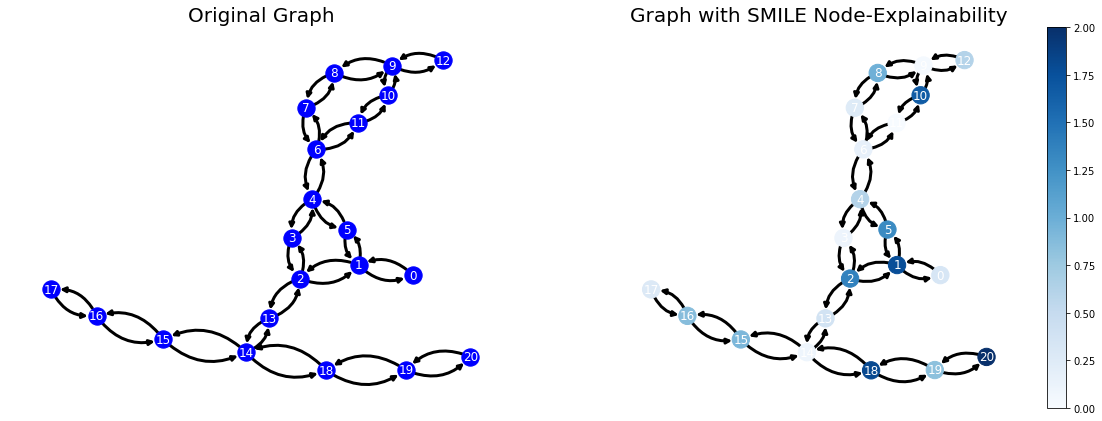

In [36]:
G = graphs_nx[idx].copy()
pos = nx.spring_layout(G, seed = 1314)

fig, axs = plt.subplots(1,2,figsize=(20,7))

nx.draw(G, pos, node_color='b', width=3.0, edge_cmap=plt.cm.Blues,with_labels=True, 
        font_color='white',connectionstyle='arc3, rad = 0.35', ax = axs[0])

nx.draw(G, pos, nodelist=G.nodes, node_color=[abs(Bounded_coeff)], width=3.0,cmap=plt.cm.Blues ,with_labels=True, 
        font_color='white',connectionstyle='arc3, rad = 0.35', ax = axs[1])

colors=range(3)
cmap=plt.cm.Blues
vmin = min(colors)
vmax = max(colors)
# nx.draw(G, pos, node_color='#A0CBE2', edge_color=colors, width=4, edge_cmap=cmap,
#            with_labels=False, vmin=vmin, vmax=vmax)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin = vmin, vmax=vmax))
sm._A = []

axs[0].set_title('Original Graph',fontsize=20)
axs[1].set_title('Graph with SMILE Node-Explainability',fontsize=20)

plt.colorbar(sm)
plt.show()

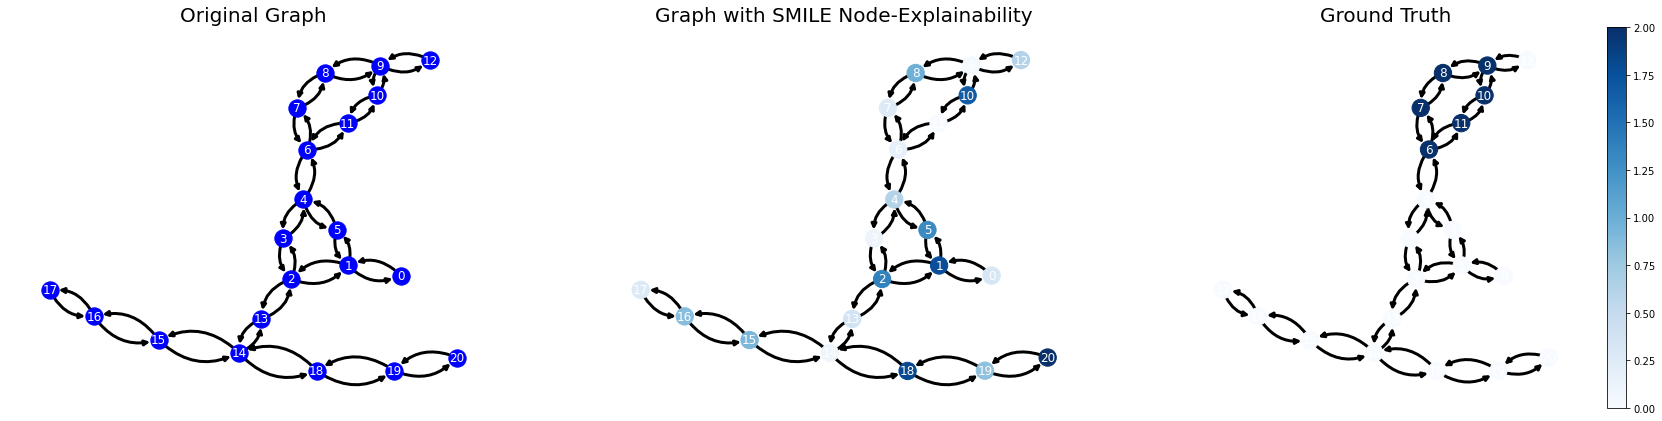

In [37]:
G = graphs_nx[idx].copy()
pos = nx.spring_layout(G, seed = 1314)

fig, axs = plt.subplots(1,3,figsize=(30,7))

nx.draw(G, pos, node_color='b', width=3.0, edge_cmap=plt.cm.Blues,with_labels=True, 
        font_color='white',connectionstyle='arc3, rad = 0.35', ax = axs[0])

nx.draw(G, pos, nodelist=G.nodes, node_color=abs(Bounded_coeff), width=3.0,cmap=plt.cm.Blues ,with_labels=True, 
        font_color='white',connectionstyle='arc3, rad = 0.35', ax = axs[1])

nx.draw(G, pos, nodelist=G.nodes, node_color=abs(exp.att_test[idx][0]+0.5), width=3.0,cmap=plt.cm.Blues ,with_labels=True, 
        font_color='white',connectionstyle='arc3, rad = 0.35', ax = axs[2])

colors=range(3)
cmap=plt.cm.Blues
vmin = min(colors)
vmax = max(colors)
# nx.draw(G, pos, node_color='#A0CBE2', edge_color=colors, width=4, edge_cmap=cmap,
#            with_labels=False, vmin=vmin, vmax=vmax)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin = vmin, vmax=vmax))
sm._A = []

axs[0].set_title('Original Graph',fontsize=20)
axs[1].set_title('Graph with SMILE Node-Explainability',fontsize=20)
axs[2].set_title('Ground Truth',fontsize=20)

plt.colorbar(sm)
plt.show()

<a id="ref"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>References</b></div> 

<div style="background-color:aliceblue; padding:30px; font-size:15px;color:#034914">

* [🔥 EDA & ML on Game Play 🎮 (ongoing)](https://www.kaggle.com/code/nguyenthicamlai/eda-ml-on-game-play-ongoing) by [Nguyen Thi Cam Lai](https://www.kaggle.com/nguyenthicamlai) used for HTML-based headers.

<center> <a href="#TOC" role="button" aria-pressed="true" >⬆️ Back to Table of Contents ⬆️</a>

<div style="border-radius:10px;border:#034914 solid;padding: 15px;background-color:aliceblue;font-size:90%;text-align:left">

<h4><b>Author :</b> Koorosh Aslansefat </h4>  
    
<center> <strong> If you liked this Notebook, please do upvote. </strong>
    
<center> <strong> If you have any questions, feel free to contact me! </strong>

<center> <img src="https://gregcfuzion.files.wordpress.com/2022/01/kind-regards-2.png" style='width: 600px; height: 300px;'>